This study examines the case of customer payment defaults in Taiwan and evaluates the forecast accuracy of six data mining algorithms for the probability of payment default. From the standpoint of risk management, the predictive accuracy of the predicted chance of default will be more beneficial than the dichotomous classification of clients as either credible or not credible. This work introduced the innovative Sorting Smoothing Method in order to determine the actual likelihood of default, which is uncertain. Using the actual probability of default as the response variable (Y) and the predictive probability of default as the independent variable (X), the result of simple linear regression (Y = A + BX) indicates that the forecasting model generated by an artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero and its regression coefficient (B) is equal to one. The only one of the six data mining techniques capable of reliably estimating the actual probability of default is artificial neural network.

In [1]:
import pandas as pd

df = pd.read_csv("D:\download\Creadit Card/UCI_Credit_Card.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment - delay for one month, 2=payment delay for two months, … 8=payment - - delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
# install package
!pip install lazypredict
!pip install shap
!pip install scikit-optimize

- "pip install predict" : This is the preferred method to install Lazy Predict, as it will always install the most recent stable release.
- "pip install shap" : SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.
- "pip install scikit-optimize" : is a simple and effective library for minimizing (extremely) costly and noisy black-box functions. It implements several sequential model-based optimization methods and aims to be accessible and simple to use in a variety of situations.

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# reduce memory
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
df = reduce_mem_usage(df)

Mem. usage decreased to  1.86 Mb (67.5% reduction)


In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int16  
 1   LIMIT_BAL                   30000 non-null  float32
 2   SEX                         30000 non-null  int8   
 3   EDUCATION                   30000 non-null  int8   
 4   MARRIAGE                    30000 non-null  int8   
 5   AGE                         30000 non-null  int8   
 6   PAY_0                       30000 non-null  int8   
 7   PAY_2                       30000 non-null  int8   
 8   PAY_3                       30000 non-null  int8   
 9   PAY_4                       30000 non-null  int8   
 10  PAY_5                       30000 non-null  int8   
 11  PAY_6                       30000 non-null  int8   
 12  BILL_AMT1                   30000 non-null  float32
 13  BILL_AMT2                   300

First and foremost. We'll see if there are any null values.

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167481.015625,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.894531,40311.359375,38871.675781,5663.590820,5.921144e+03,5225.682617,4826.082031,4799.392090,5215.518066,0.221200
std,8660.398374,129743.382812,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.000000,60797.367188,59553.609375,16563.017578,2.304034e+04,17606.562500,15665.456055,15278.589844,17777.894531,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**Exploratory Data Analysis**

In [11]:
#renaming for better convinience
df['is_defaulter'] =df['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Find out in the "is_defaulter" column which number is 0 and how many is 1 and see graphic form.

<AxesSubplot:xlabel='is_defaulter', ylabel='count'>

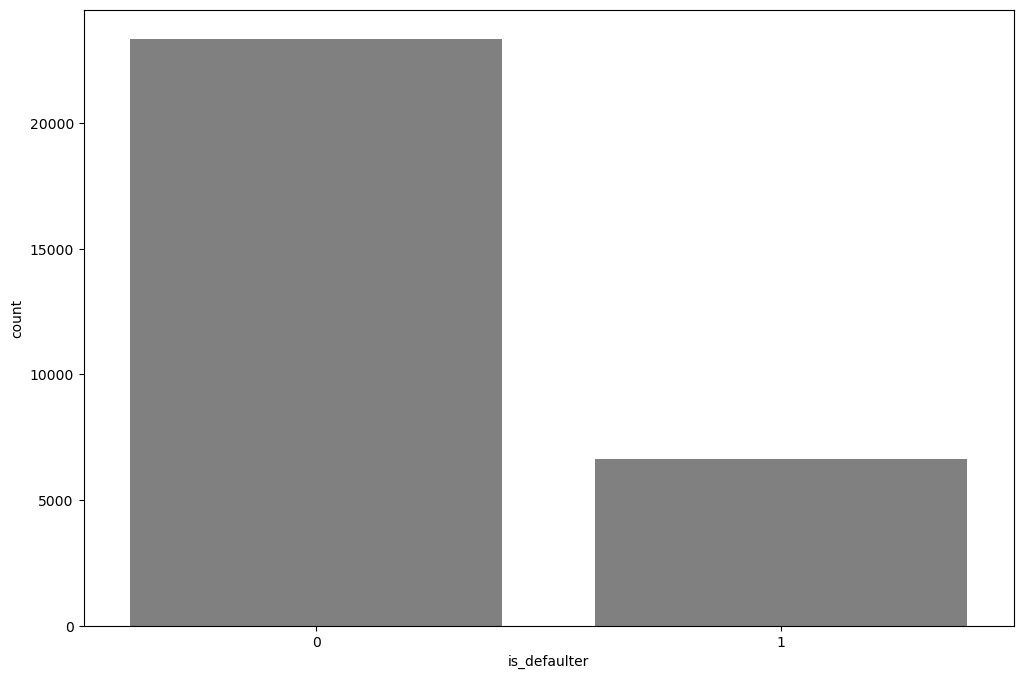

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'is_defaulter', data = df, color = "grey")

In [13]:
df['is_defaulter'].value_counts()

0    23364
1     6636
Name: is_defaulter, dtype: int64

The above chart clearly demonstrates that our dataset is unbalanced, with one class significantly larger than the other.

**Independent Variabel**

There are few independent variabel in this dataset:
   - Sex
   - Marriage
   - Education
   - Limit Balance
   - Age
   - History payment status
   - Paid Amount

Let's look at the number of values in the independent features.

Sex
- 1 - Male
- 2 - Female

In [14]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Education
- 1 - graduate school
- 2 - university
- 3 - high school
- 4 - others

In [15]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

We observe in the dataset that there are numbers like 5,6,0 for which we have no description, therefore we may lump them all together under the heading Others, making the total number of undefined values 4.

In [16]:
fill_education = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fill_education, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Marriage
- 1 = married
- 2 = single
- 3 = others

In [17]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Not many possibilities exist for the value 0. That's why I'm filing them under "Others" (to be join number 3)

In [18]:
fill_marriage = df['MARRIAGE'] == 0
df.loc[fill_marriage, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [19]:
# Plotting our categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Default'] = df['is_defaulter']

C:\Users\Kevin Kiding\AppData\Local\Temp\ipykernel_11924\1389922964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Default'] = df['is_defaulter']


In [20]:
df_cat.replace({'SEX': {1 : 'Male', 2 : 'Female'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

C:\Users\Kevin Kiding\AppData\Local\Temp\ipykernel_11924\441868572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1 : 'Male', 2 : 'Female'},


<Figure size 1500x1000 with 0 Axes>

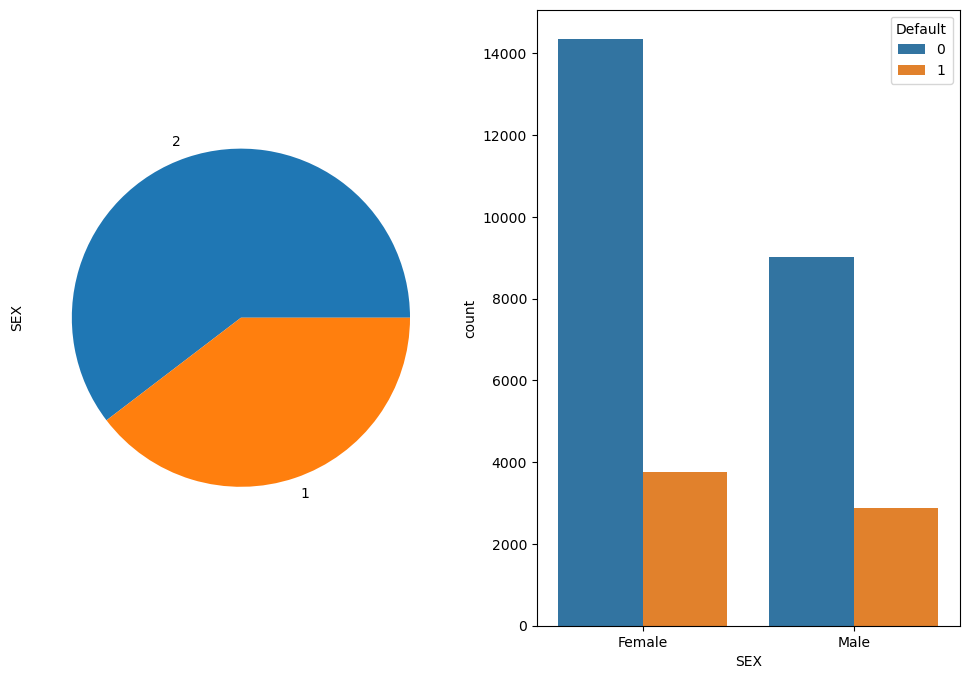

<Figure size 1500x1000 with 0 Axes>

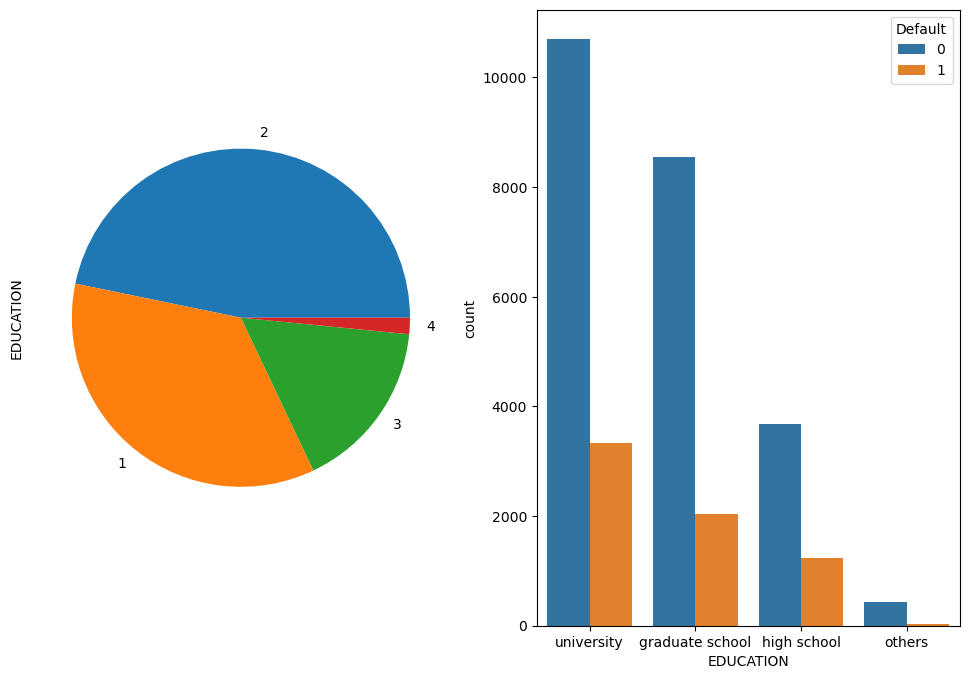

<Figure size 1500x1000 with 0 Axes>

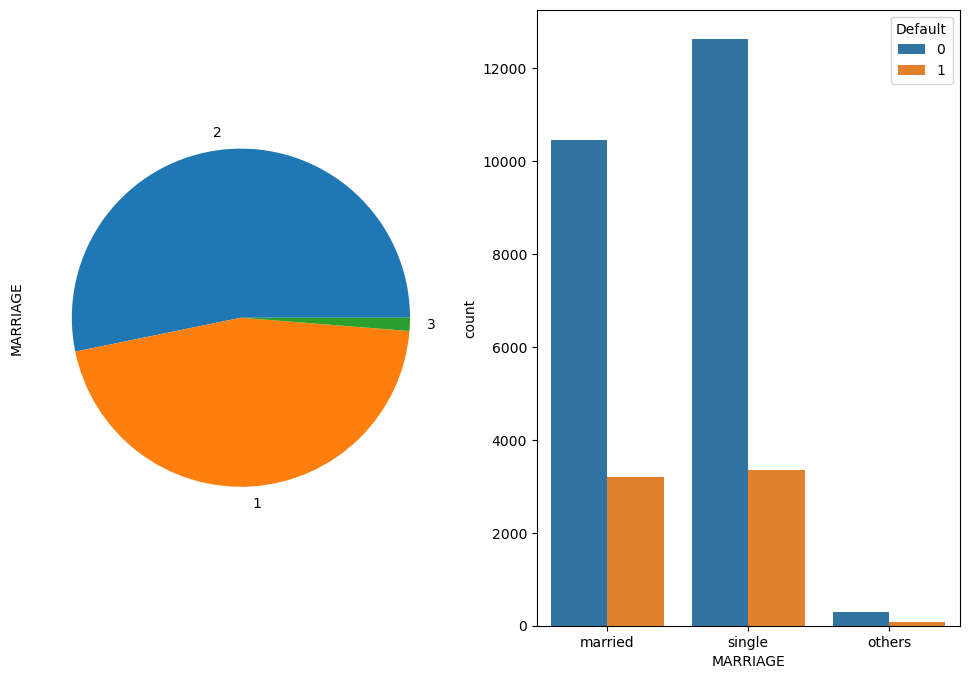

In [21]:
for col in categorical_features:
  plt.figure(figsize=(15,10))
  fig, axes = plt.subplots(ncols=2,figsize=(12,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Default', data = df_cat)

In [22]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167481.015625
std       129743.382812
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<AxesSubplot:xlabel='is_defaulter', ylabel='LIMIT_BAL'>

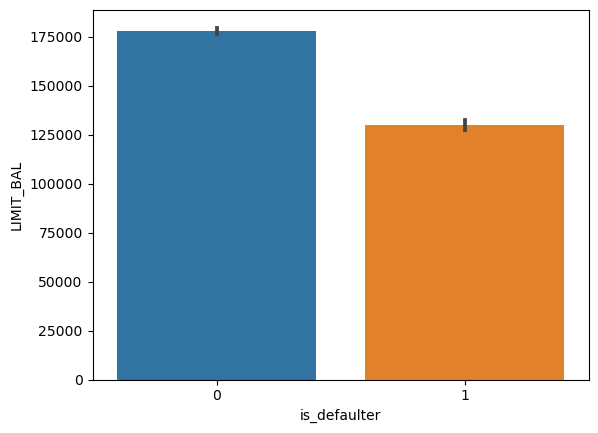

In [23]:
sns.barplot(x='is_defaulter', y='LIMIT_BAL', data=df)

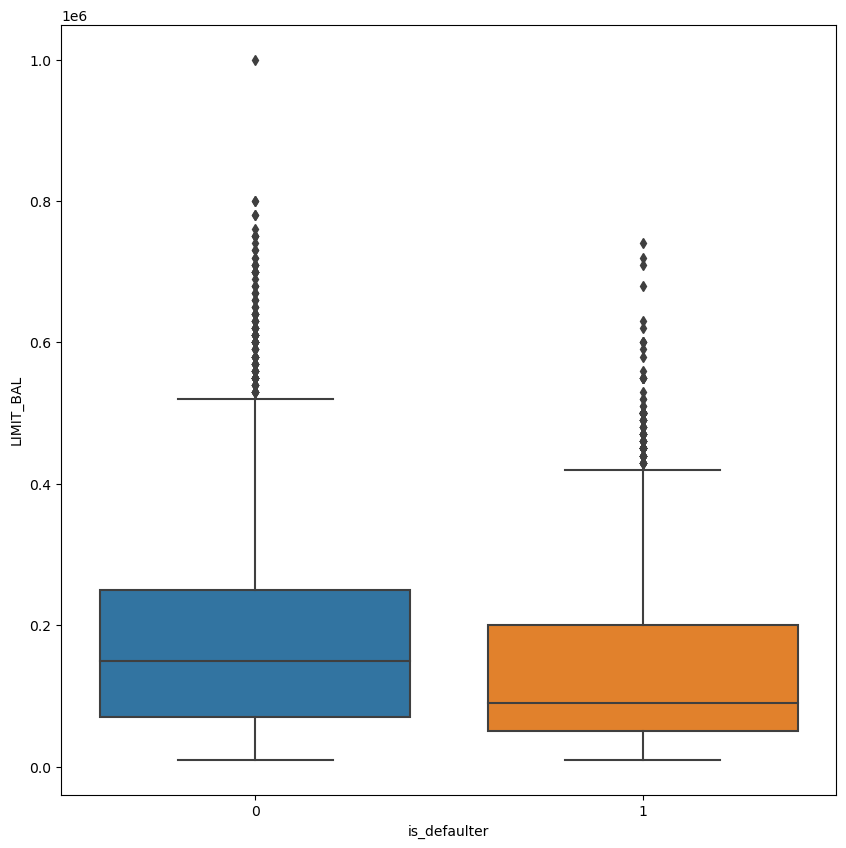

In [24]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="is_defaulter", y="LIMIT_BAL", data=df)

In [25]:
# rename columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [26]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,is_defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,0


AGE

Age distribution of all credit card holders (regardless of gender) plotted on a graph.

In [27]:
print(df['AGE'].value_counts())

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64


<AxesSubplot:xlabel='index', ylabel='AGE'>

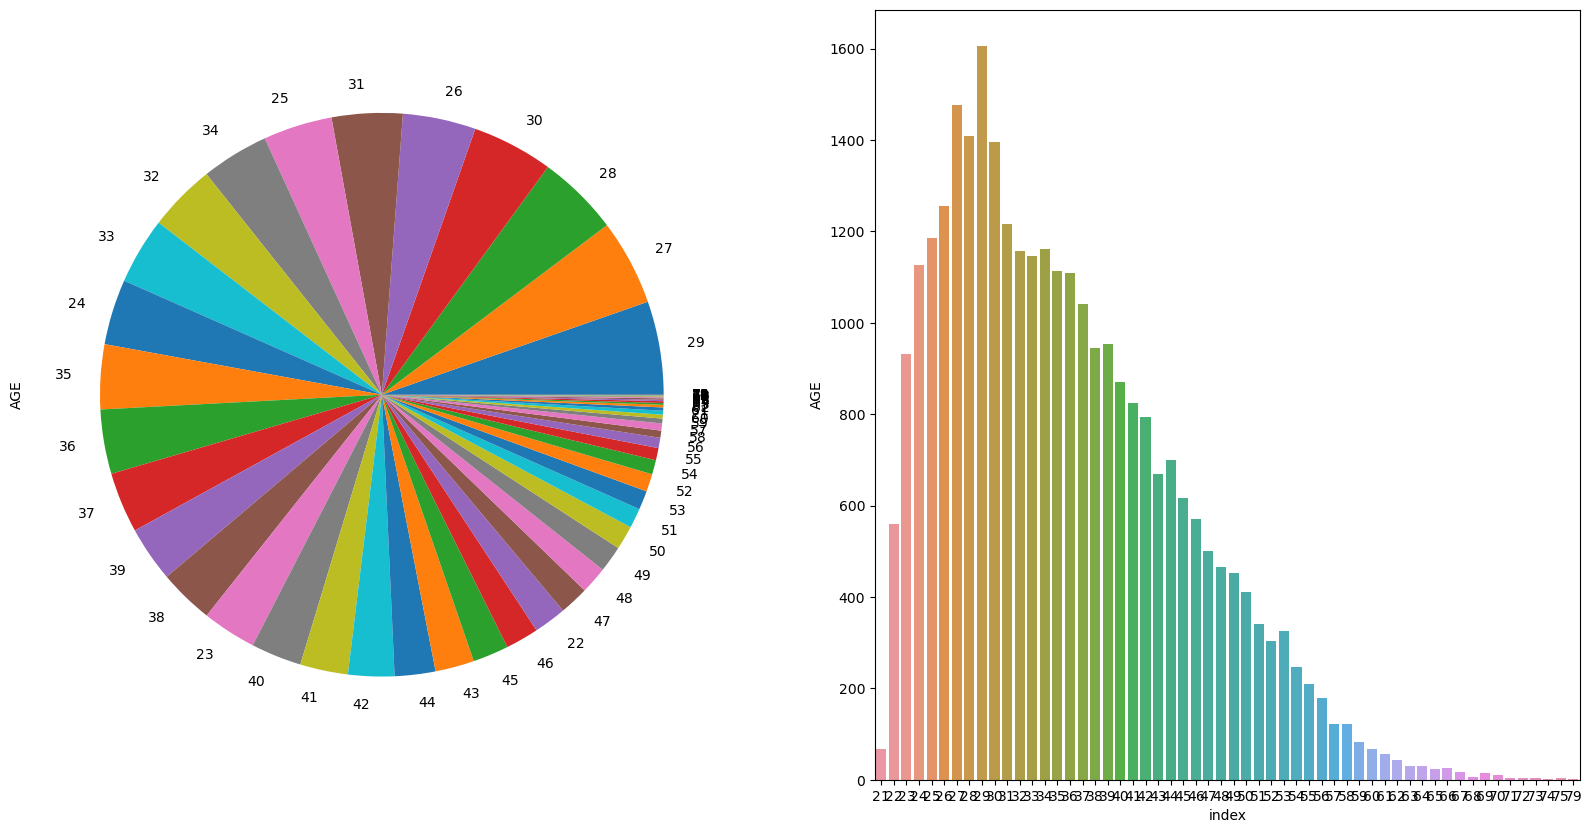

In [28]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

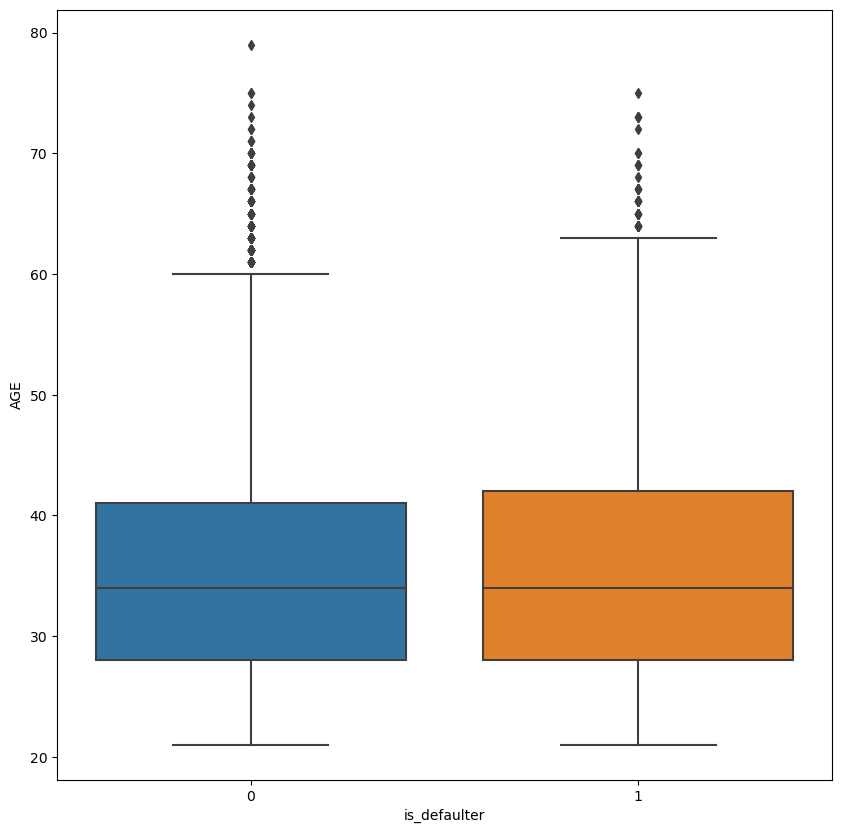

In [29]:
df.groupby('is_defaulter')['AGE'].mean()
plt.figure(figsize=(10,10))
ax = sns.boxplot(x = "is_defaulter", y = "AGE", data=df)

In [30]:
df = df.astype('int')

**Bill Amount**

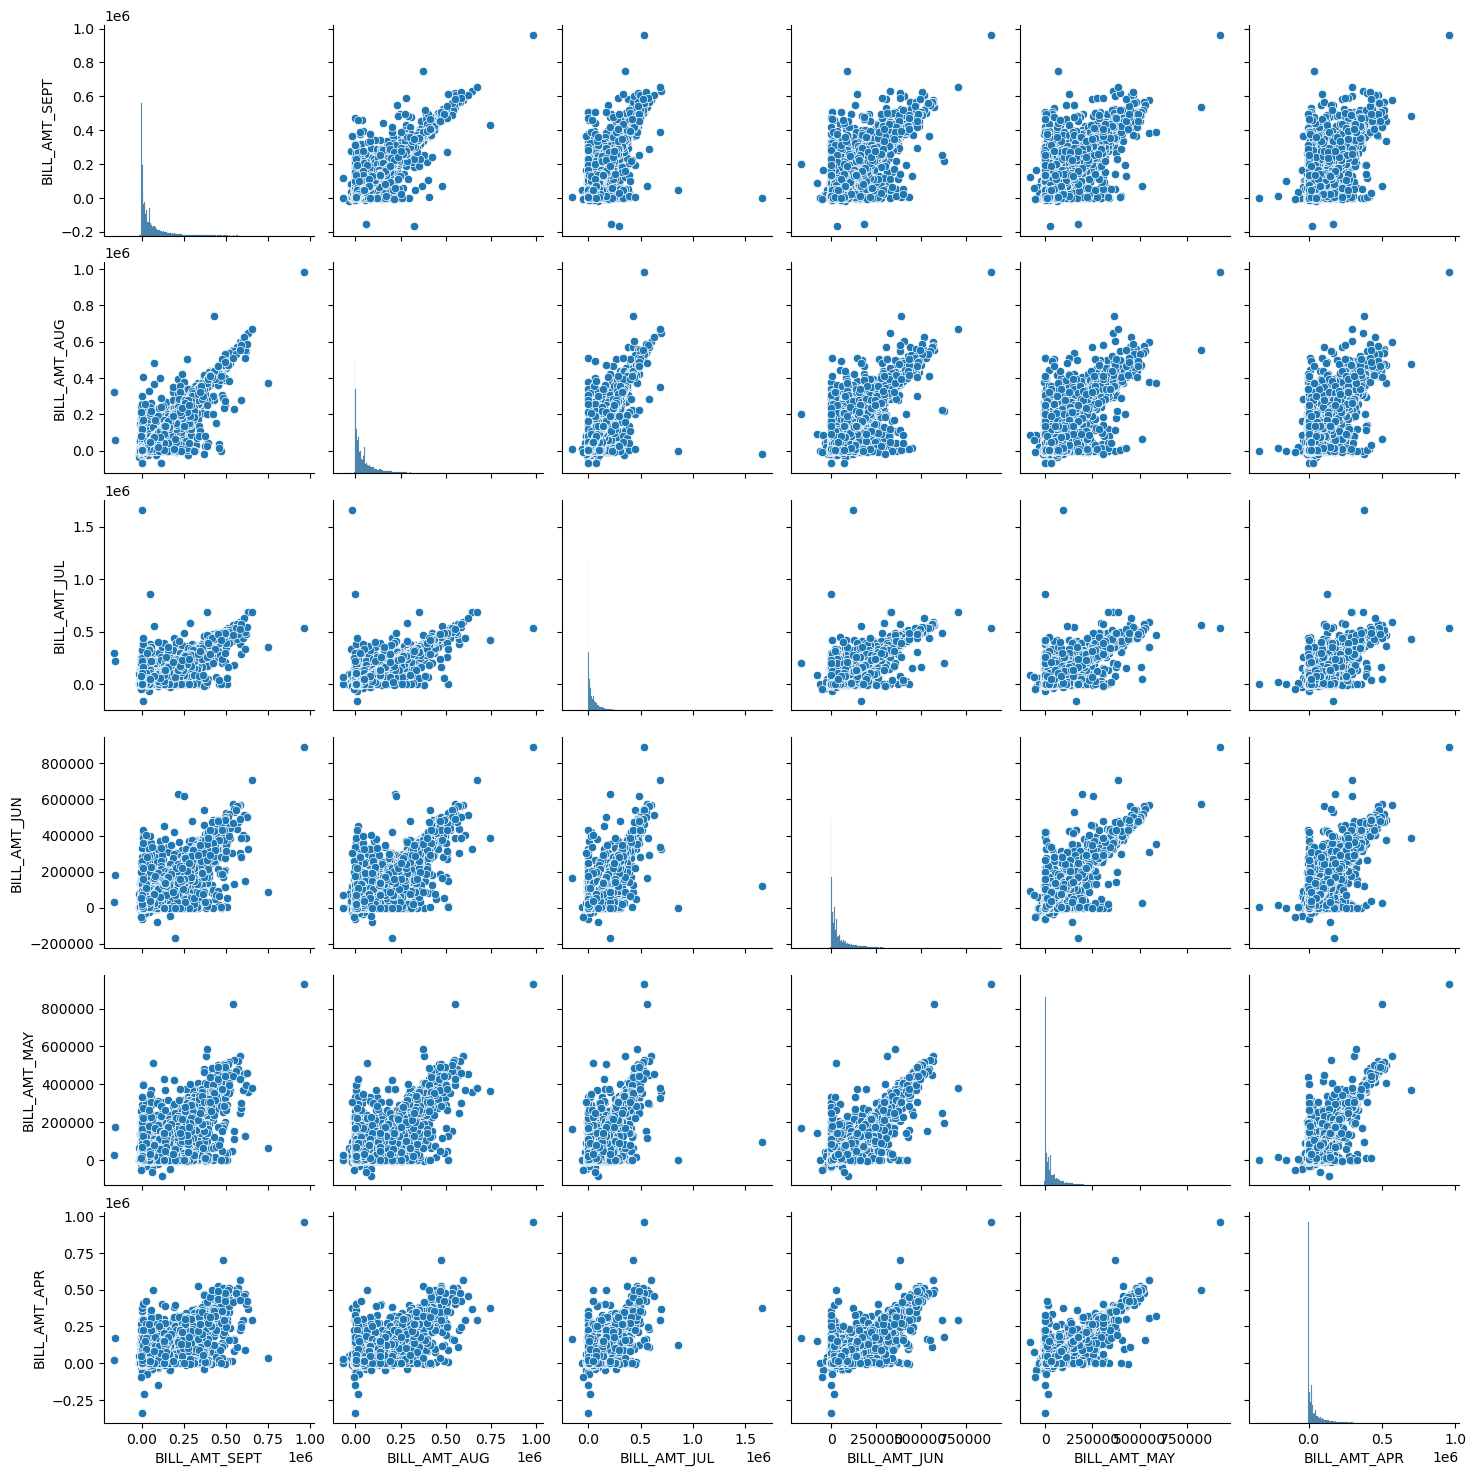

In [31]:
de_bill_amount = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',	'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = de_bill_amount)

History Payment Status

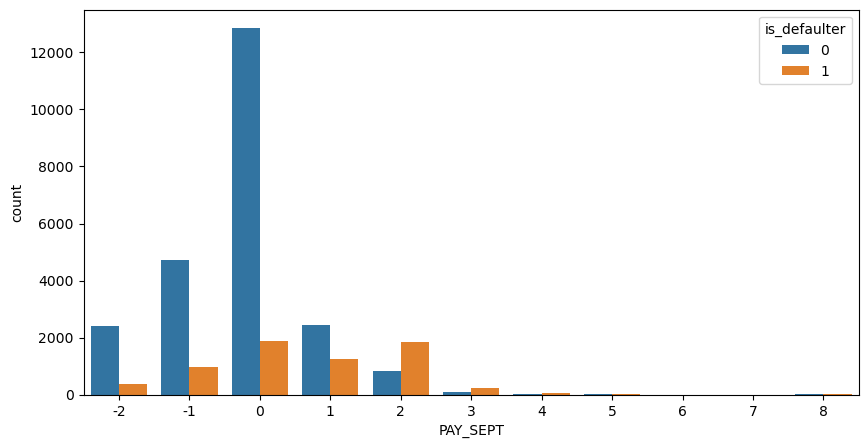

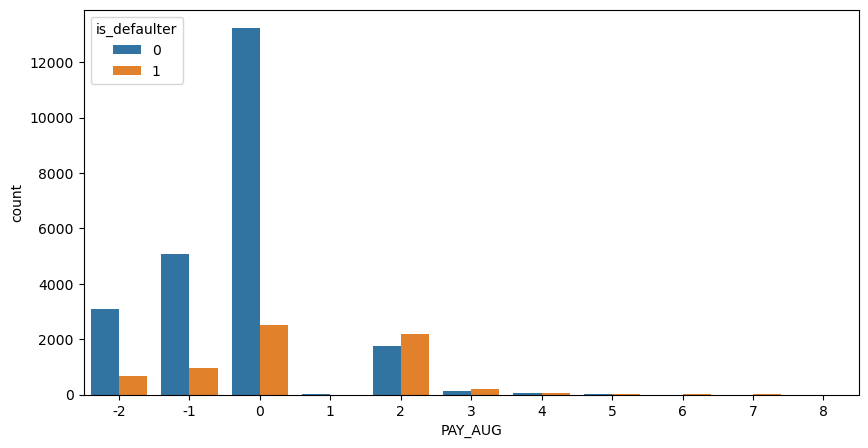

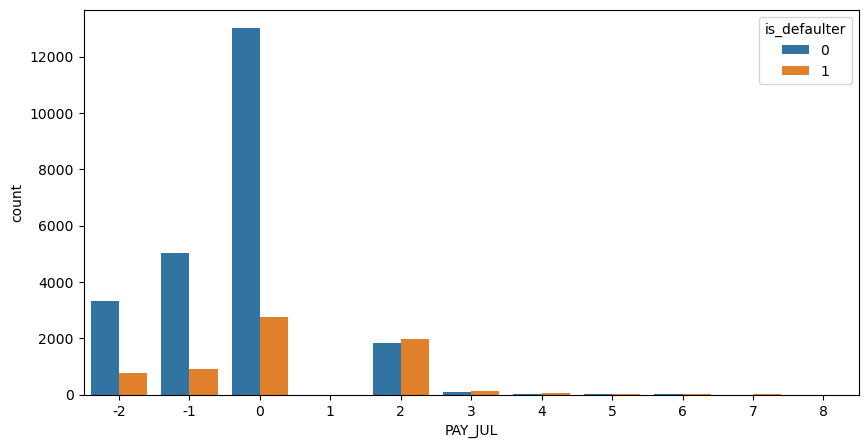

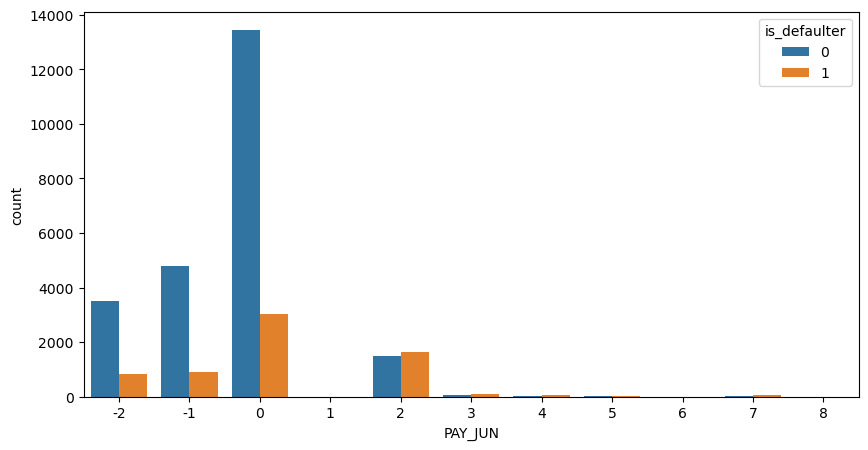

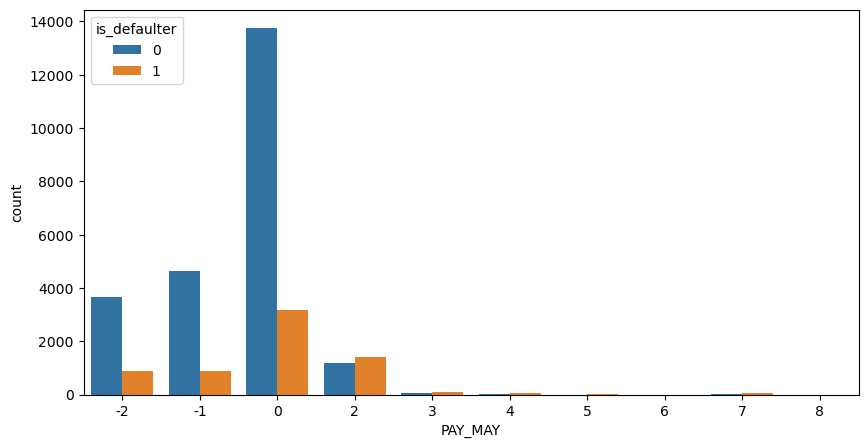

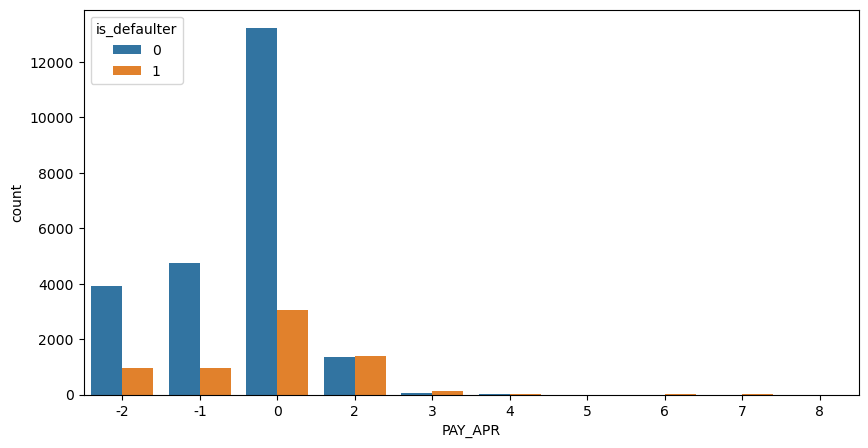

In [32]:
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'is_defaulter', data = df)

Paid Amount

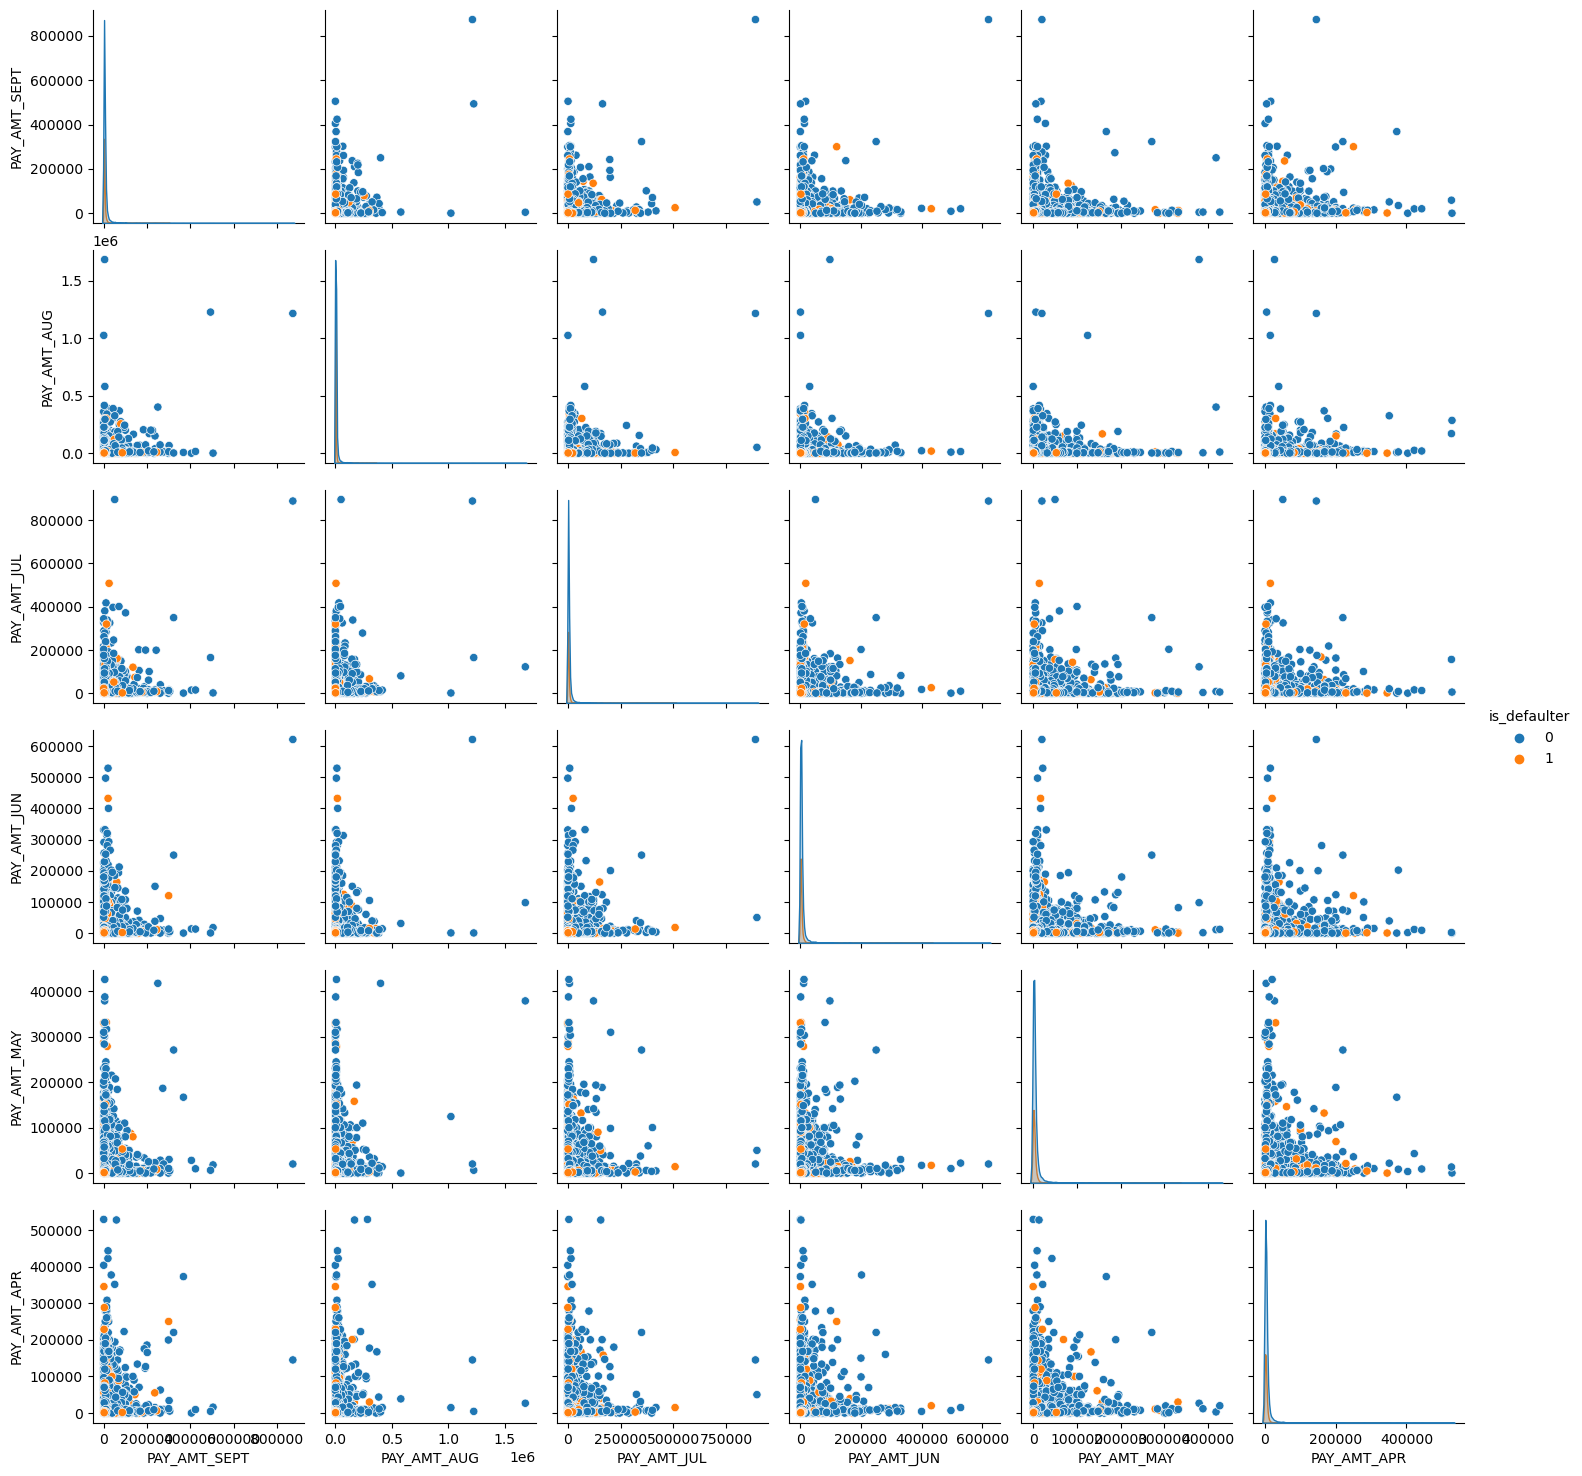

In [33]:
df_amount = df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'is_defaulter']]
sns.pairplot(data = df_amount, hue='is_defaulter')

An unbalanced dataset is a problem, as we saw earlier. Therefore, we are employing SMOTE ((Synthetic Minority Oversampling Technique) to correct the Imbalance.

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['is_defaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [35]:
X_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18164,120000,1,2,1,41,0,0,0,0,...,6130,5572,3282,2902,2008,1224,5572,3282,687,1
46724,5944,101317,1,3,1,28,2,3,2,1,...,48478,27900,3645,329,658,263,1826,3645,102,1
46725,15516,30000,1,2,1,42,1,0,0,0,...,13013,14327,16691,1953,2793,3000,1593,2610,1141,1
46726,12769,80000,2,3,1,47,0,0,0,2,...,74261,72759,77334,3067,5509,3401,0,5941,0,1


C:\Users\Kevin Kiding\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_defaulter', ylabel='count'>

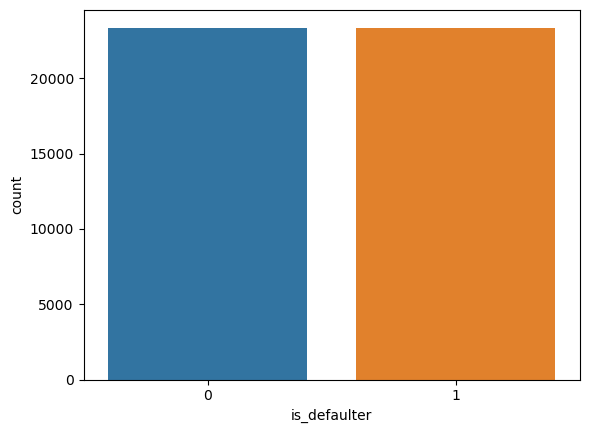

In [36]:
columns = list(df.columns)
df_balance = pd.DataFrame(X_smote, columns=columns)
df_balance['is_defaulter'] = y_smote
sns.countplot('is_defaulter', data = df_balance)

In [37]:
df_balance[df_balance['is_defaulter'] == 1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,is_defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,1
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18164,120000,1,2,1,41,0,0,0,0,...,5572,3282,2902,2008,1224,5572,3282,687,1,1
46724,5944,101317,1,3,1,28,2,3,2,1,...,27900,3645,329,658,263,1826,3645,102,1,1
46725,15516,30000,1,2,1,42,1,0,0,0,...,14327,16691,1953,2793,3000,1593,2610,1141,1,1
46726,12769,80000,2,3,1,47,0,0,0,2,...,72759,77334,3067,5509,3401,0,5941,0,1,1


**Feature Enginering**

In [38]:
df_featrue_engineering = df_balance.copy()
df_featrue_engineering['Payement_Value'] = df_featrue_engineering['PAY_SEPT'] + df_featrue_engineering['PAY_AUG'] + df_featrue_engineering['PAY_JUL'] + df_featrue_engineering['PAY_JUN'] + df_featrue_engineering['PAY_MAY'] + df_featrue_engineering['PAY_APR']

In [39]:
df_featrue_engineering.groupby('is_defaulter')['Payement_Value'].mean()

is_defaulter
0   -1.980140
1    1.670048
Name: Payement_Value, dtype: float64

<AxesSubplot:xlabel='is_defaulter', ylabel='Payement_Value'>

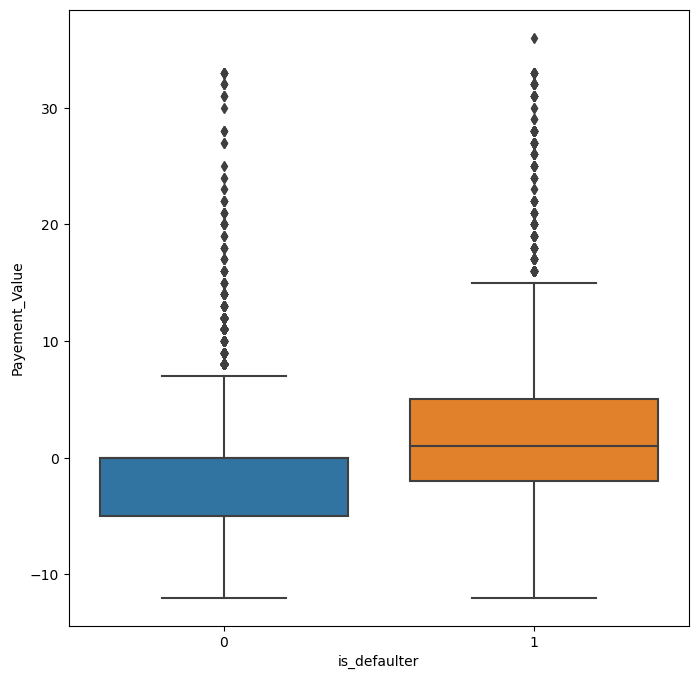

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df_featrue_engineering, x = 'is_defaulter', y = 'Payement_Value')

In [41]:
df_featrue_engineering['Dues'] = (df_featrue_engineering['BILL_AMT_APR']+df_featrue_engineering['BILL_AMT_MAY']+df_featrue_engineering['BILL_AMT_JUN']+df_featrue_engineering['BILL_AMT_JUL']+df_featrue_engineering['BILL_AMT_SEPT'])-(df_featrue_engineering['PAY_AMT_APR']+df_featrue_engineering['PAY_AMT_MAY']+df_featrue_engineering['PAY_AMT_JUN']+df_featrue_engineering['PAY_AMT_JUL']+df_featrue_engineering['PAY_AMT_AUG']+df_featrue_engineering['PAY_AMT_SEPT'])
df_featrue_engineering['Dues'] 

0          3913
1         10352
2         76608
3        174713
4         44620
          ...  
46723    125159
46724    283729
46725     46829
46726    346221
46727     35728
Name: Dues, Length: 46728, dtype: int32

In [42]:
df_featrue_engineering.groupby('is_defaulter')['Dues'].mean()

is_defaulter
0    187742.051532
1    195212.428651
Name: Dues, dtype: float64

In [43]:
df_featrue_engineering['EDUCATION'].unique()

array([2, 1, 3, 4])

In [44]:
df_featrue_engineering['EDUCATION']=np.where(df_featrue_engineering['EDUCATION'] == 6, 4, df_featrue_engineering['EDUCATION'])
df_featrue_engineering['EDUCATION']=np.where(df_featrue_engineering['EDUCATION'] == 0, 4, df_featrue_engineering['EDUCATION'])

In [45]:
df_featrue_engineering['MARRIAGE'].unique()

array([1, 2, 3])

In [46]:
df_featrue_engineering['MARRIAGE']=np.where(df_featrue_engineering['MARRIAGE'] == 0, 3, df_featrue_engineering['MARRIAGE'])

In [47]:
df_featrue_engineering.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [48]:
df_featrue_engineering.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,is_defaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,689,0,0,0,0,1,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0,-2,44620
5,6,50000,MALE,graduate school,single,37,0,0,0,0,...,2500,1815,657,1000,1000,800,0,0,0,173273
6,7,500000,MALE,graduate school,single,29,0,0,0,0,...,55000,40000,38000,20239,13750,13770,0,0,0,2131813
7,8,100000,FEMALE,university,single,23,0,-1,-1,0,...,380,601,0,581,1687,1542,0,0,-3,8315
8,9,140000,FEMALE,high school,married,28,0,0,2,0,...,3329,0,432,1000,1000,1000,0,0,2,44355
9,10,20000,MALE,high school,single,35,-2,-2,-2,-2,...,0,0,0,13007,1122,0,0,0,-10,12790


**One Hote Encoding**

In [49]:
df_featrue_engineering = pd.get_dummies(df_featrue_engineering,columns=['EDUCATION','MARRIAGE'])
df_featrue_engineering.head(10)

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,is_defaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620,0,0,0,1,1,0,0
5,6,50000,MALE,37,0,0,0,0,0,0,...,0,0,173273,1,0,0,0,0,0,1
6,7,500000,MALE,29,0,0,0,0,0,0,...,0,0,2131813,1,0,0,0,0,0,1
7,8,100000,FEMALE,23,0,-1,-1,0,0,-1,...,0,-3,8315,0,0,0,1,0,0,1
8,9,140000,FEMALE,28,0,0,2,0,0,0,...,0,2,44355,0,1,0,0,1,0,0
9,10,20000,MALE,35,-2,-2,-2,-2,-1,-1,...,0,-10,12790,0,1,0,0,0,0,1


In [50]:
df_featrue_engineering.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)
df_featrue_engineering = pd.get_dummies(df_featrue_engineering, columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )
df_featrue_engineering

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,18164,120000,MALE,41,118662,8087,7188,6130,5572,3282,...,1,0,0,0,0,0,0,0,0,0
46724,5944,101317,MALE,28,111189,106964,99340,48478,27900,3645,...,1,0,0,0,0,0,0,0,0,0
46725,15516,30000,MALE,42,5695,7539,10193,13013,14327,16691,...,0,1,0,0,0,0,0,0,0,0
46726,12769,80000,FEMALE,47,67137,68873,72648,74261,72759,77334,...,0,0,0,1,0,0,0,0,0,0


In [51]:
# label Encoding for "Sex"
encoders_sex = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_featrue_engineering = df_featrue_engineering.replace(encoders_sex)
df_featrue_engineering.head(10)

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0
5,6,50000,1,37,64400,57069,57608,19394,19619,20024,...,0,1,0,0,0,0,0,0,0,0
6,7,500000,1,29,367965,412023,445007,542653,483003,473944,...,0,1,0,0,0,0,0,0,0,0
7,8,100000,0,23,11876,380,601,221,-159,567,...,1,0,0,0,0,0,0,0,0,0
8,9,140000,0,28,11285,14096,12108,12211,11793,3719,...,0,1,0,0,0,0,0,0,0,0
9,10,20000,1,35,0,0,0,0,13007,13912,...,1,0,0,0,0,0,0,0,0,0


In [52]:
df_featrue_engineering.drop('ID',axis = 1, inplace = True)

In [53]:
# save new file into my computer
df_featrue_engineering.to_csv('D:\download/Final_df.csv')

In [54]:
df = pd.read_csv("D:\download/Final_df.csv", sep=',')
df.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,2,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,3,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,4,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [55]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,120000,1,41,118662,8087,7188,6130,5572,3282,2902,...,1,0,0,0,0,0,0,0,0,0
46724,101317,1,28,111189,106964,99340,48478,27900,3645,329,...,1,0,0,0,0,0,0,0,0,0
46725,30000,1,42,5695,7539,10193,13013,14327,16691,1953,...,0,1,0,0,0,0,0,0,0,0
46726,80000,0,47,67137,68873,72648,74261,72759,77334,3067,...,0,0,0,1,0,0,0,0,0,0


## Implementing Logistic Regression

One of the simplest algorithms, Logistic Regression, calculates the likelihood of an event based on the estimated relationship between a single binary dependent variable and a set of independent variables. The regulation parameter governs the trade-off between model complexity (overfitting) and simplicity. (underfitting). The regulatory strength decreases, and the model becomes more complicated, leading to overfitting the data for high levels.

In [89]:
log_reg = df.copy()
log_reg

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,120000,1,41,118662,8087,7188,6130,5572,3282,2902,...,1,0,0,0,0,0,0,0,0,0
46724,101317,1,28,111189,106964,99340,48478,27900,3645,329,...,1,0,0,0,0,0,0,0,0,0
46725,30000,1,42,5695,7539,10193,13013,14327,16691,1953,...,0,1,0,0,0,0,0,0,0,0
46726,80000,0,47,67137,68873,72648,74261,72759,77334,3067,...,0,0,0,1,0,0,0,0,0,0


In [90]:
# split dataset
X = log_reg.drop(['is_defaulter','Payement_Value','Dues'],axis=1)
y = log_reg['is_defaulter']

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)
print("Sum of Training dataset: ", len(X_train))
print("Sum of Testing dataset: ",len(X_test))

Sum of Training dataset:  35046
Sum of Testing dataset:  11682


In [94]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\Kevin Kiding\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kevin Kiding\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kevin Kiding\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Kevin Kiding\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [95]:
optimized_clf = grid_lr_clf.best_estimator_
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [96]:
grid_lr_clf.best_score_

1.0

In [97]:
# Predicted Probability
train_predict = optimized_clf.predict_proba(X_train)[:,1]
test_predict = optimized_clf.predict_proba(X_test)[:,1]

# Get the predicted classes
train_class_predict = optimized_clf.predict(X_train)
test_class_predict = optimized_clf.predict(X_test)

# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_predict,y_train)
test_accuracy_lr = accuracy_score(test_class_predict,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)


The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [98]:
test_accuracy_lr = accuracy_score(test_class_predict,y_test)
test_precision_score_lr = precision_score(test_class_predict,y_test)
test_recall_score_lr = recall_score(test_class_predict,y_test)
test_f1_score_lr = f1_score(test_class_predict,y_test)
test_roc_score_lr = roc_auc_score(test_class_predict,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


[[17523     0]
 [    0 17523]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

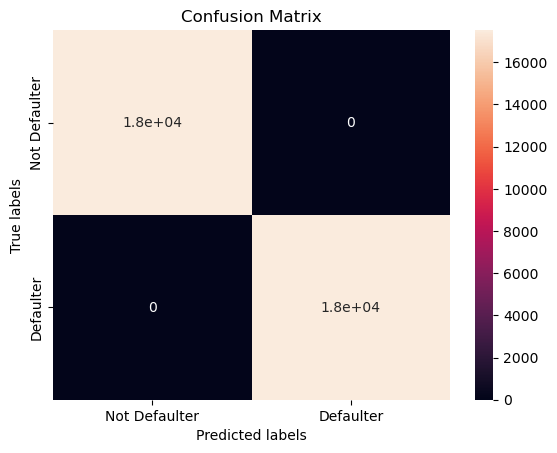

In [99]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [100]:
y_predict_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

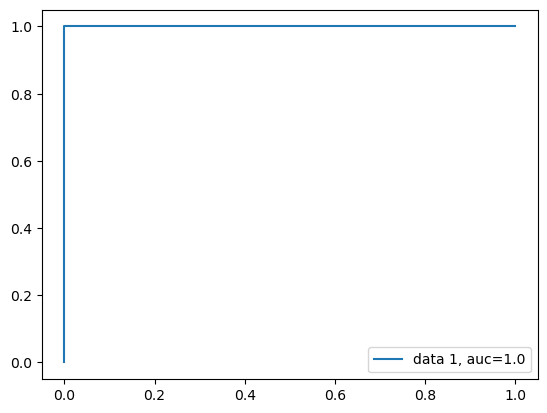

In [101]:
import sklearn.metrics as metrics
y_pred_proba = y_predict_proba_lr
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Implementing SVC**

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [104]:
X = df_featrue_engineering.drop(['is_defaulter','Payement_Value','Dues'],axis=1)
y = df_featrue_engineering['is_defaulter']

In [105]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)

In [107]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

Details:
- n_jobs : an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used.
- verbose: refers to a mode or setting that displays or gets extended information.
- CV : Computer Vision

In [108]:
optimal_SVC_clf = grid_clf.best_estimator_

In [109]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [110]:
grid_clf.best_score_

0.9966329966329966

In [111]:
# Get the predicted classes
train_class_predict = optimal_SVC_clf.predict(X_train)
test_class_predict = optimal_SVC_clf.predict(X_test)

In [112]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_predict,y_train)
test_accuracy_SVC = accuracy_score(test_class_predict,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [113]:
test_accuracy_SVC = accuracy_score(test_class_predict,y_test)
test_precision_score_SVC = precision_score(test_class_predict,y_test)
test_recall_score_SVC = recall_score(test_class_predict,y_test)
test_f1_score_SVC = f1_score(test_class_predict,y_test)
test_roc_score_SVC = roc_auc_score(test_class_predict,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.9967471323403527
The precision on test data is  0.9986303715117274
The recall on test data is  0.9948831656148729
The f1 on test data is  0.9967532467532467
The roc_score on test data is  0.9967541794735303


In [114]:
train_accuracy_SVC = accuracy_score(train_class_predict,y_train)
train_precision_score_SVC = precision_score(train_class_predict,y_train)
train_recall_score_SVC = recall_score(train_class_predict,y_train)
train_f1_score_SVC = f1_score(train_class_predict,y_train)
train_roc_score_SVC = roc_auc_score(train_class_predict,y_train)

print("The accuracy on train data is ", train_accuracy_SVC)
print("The precision on train data is ", train_precision_score_SVC)
print("The recall on train data is ", train_recall_score_SVC)
print("The f1 on train data is ", train_f1_score_SVC)
print("The roc_score on train data is ", train_roc_score_SVC)

The accuracy on train data is  0.999942932146322
The precision on train data is  1.0
The recall on train data is  0.999885877318117
The f1 on train data is  0.999942935402876
The roc_score on train data is  0.9999429386590585


We can see from above results that we are getting 100% train accuracy and 99.7% for test accuracy which is good, and f1- score is 99.7%.

[[17521     2]
 [    0 17523]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

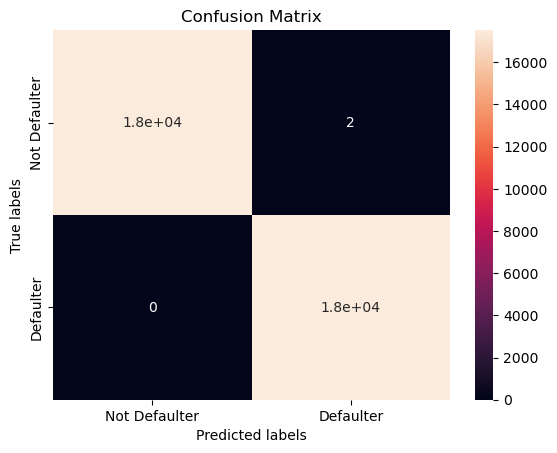

In [115]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Python and Torch form the basis of the PyTorch deep learning tensor library, which is optimized for use with Python. Applications that are demanding on both the GPU and the CPU will make extensive use of this library. Because it is fully Pythonic and makes use of dynamic computation graphs, it is typically favored more than alternative deep learning frameworks such as TensorFlow and Keras.

With the help of this library, scientists, developers, and neural network debuggers are able to run and test sections of code in real time. Because of this, the end user does not have to wait until the entire piece of code has been implemented before determining whether or not a portion of the code is functional.

In [116]:
# using pakcage torch
import torch

In [117]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"./{model_save_name}" 
torch.save(optimal_SVC_clf, path)
optimal_SVC_clf = torch.load(path)

In [118]:
optimal_SVC_clf

SVC(C=10, probability=True)

In [119]:
# Get the predicted classes
train_class_predict = optimal_SVC_clf.predict(X_train)
test_class_predict = optimal_SVC_clf.predict(X_test)

In [120]:
y_predict_probability_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

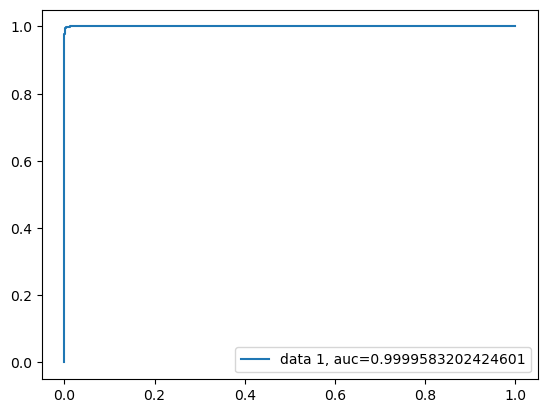

In [121]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_predict_probability_SVC)
auc = roc_auc_score(y_test, y_predict_probability_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Implementing Decision Tree**

Due to the fact that it is simple to interpret and comprehend, Decision Tree is yet another algorithm that is used extensively for classification problems. A feature is represented by an internal node, a decision rule is represented by the branch, and the outcome is represented by each leaf node in the tree. The fact that decision trees require less data preprocessing that is, there is no need to normalize features is one of the advantages that they offer. However, when the data set is imbalanced, noisy data makes it easy to overfit the model, which in turn leads to biased results.

In [122]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [123]:
from sklearn.tree import DecisionTreeClassifier 
X = df_featrue_engineering.drop(['is_defaulter','Payement_Value','Dues'],axis=1)
y = df_featrue_engineering['is_defaulter']

In [124]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)

print("Numbers of Train Dataset: ", len(X_train))
print("Numbers of Test Dataset: ", len(X_test))

Numbers of Train Dataset:  35046
Numbers of Test Dataset:  11682


In [125]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [126]:
grid_DTC_clf.best_score_

1.0

In [127]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [128]:
# Getting the predicted classes
train_class_predict = optimal_DTC_clf.predict(X_train)
test_class_predict = optimal_DTC_clf.predict(X_test)

print("Predicted Train class is: ", train_class_predict)
print("Predicted Test class is: ",test_class_predict)

Predicted Train class is:  [0 1 0 ... 1 1 0]
Predicted Test class is:  [1 0 0 ... 0 0 0]


In [129]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [130]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_predict,y_train)
test_accuracy_DTC = accuracy_score(test_class_predict,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


## Implementation Random Forest

- Random Forest is a technique used to classify big data sets in machine learning. Due to the fact that its function can be applied to several dimensions with varying scales and great performance. This categorization is achieved by merging the branches in the decision tree using the available training dataset.
- Random Forest functions by constructing many decision trees and merging them to get more accurate and consistent forecasts. Random Forest creates a collection of decision trees that are typically trained using the bagging approach. The bagging approach is based on a collection of learning models to improve the overall output.
- While growing a tree, the Random Forest algorithm promotes randomness in the model. When dividing a node, Random Forest looks for the best feature from a random subset of features rather than the most essential feature. As a result, it produces a great deal of variation and, in general, superior models.

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
X = df_featrue_engineering.drop(['is_defaulter','Payement_Value','Dues'],axis=1)
y = df_featrue_engineering['is_defaulter']

In [133]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

# Get the predicted classes
train_class_predict = rf_clf.predict(X_train)
test_class_predict = rf_clf.predict(X_test)

In [134]:
# Getting the accuracy scores
train_accuracy_rf = accuracy_score(train_class_predict,y_train)
test_accuracy_rf = accuracy_score(test_class_predict,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [135]:
test_accuracy_rf = accuracy_score(test_class_predict,y_test)
test_precision_score_rf = precision_score(test_class_predict,y_test)
test_recall_score_rf = recall_score(test_class_predict,y_test)
test_f1_score_rf = f1_score(test_class_predict,y_test)
test_roc_score_rf = roc_auc_score(test_class_predict,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


In [136]:
train_accuracy_rf = accuracy_score(train_class_predict, y_train)
train_precision_score_rf = precision_score(train_class_predict, y_train)
train_recall_score_rf = recall_score(train_class_predict, y_train)
train_f1_score_rf = f1_score(train_class_predict, y_train)
train_roc_score_rf = roc_auc_score(train_class_predict, y_train)

print("The accuracy on train data is ", train_accuracy_rf)
print("The precision on train data is ", train_precision_score_rf)
print("The recall on train data is ", train_recall_score_rf)
print("The f1 on train data is ", train_f1_score_rf)
print("The roc_score on train data is ", train_roc_score_rf)

The accuracy on train data is  1.0
The precision on train data is  1.0
The recall on train data is  1.0
The f1 on train data is  1.0
The roc_score on train data is  1.0


We can see from above results that we are getting 100% train accuracy and 99.9% for test accuracy which depicts that model is overfitting, and our f1-score is around 99.9%.

In [137]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [138]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4, cv = 4)
grid_rf_clf.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=4)

In [139]:
grid_rf_clf.best_score_

1.0

In [140]:
grid_rf_clf.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [141]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [142]:
# Get the predicted classes
train_class_predicted = optimal_rf_clf.predict(X_train)
test_class_predicted = optimal_rf_clf.predict(X_test)

# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_predicted,y_train)
test_accuracy_rf = accuracy_score(test_class_predicted,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9999143982194829


In [143]:
test_accuracy_rf = accuracy_score(test_class_predicted,y_test)
test_precision_score_rf = precision_score(test_class_predicted,y_test)
test_recall_score_rf = recall_score(test_class_predicted,y_test)
test_f1_score_rf = f1_score(test_class_predicted,y_test)
test_roc_score_rf = roc_auc_score(test_class_predicted,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9999143982194829
The precision on test data is  1.0
The recall on test data is  0.999828825744608
The f1 on test data is  0.9999144055465206
The roc_score on test data is  0.999914412872304


In [144]:
train_accuracy_rf = accuracy_score(train_class_predicted, y_train)
train_precision_score_rf = precision_score(train_class_predicted, y_train)
train_recall_score_rf = recall_score(train_class_predicted, y_train)
train_f1_score_rf = f1_score(train_class_predicted, y_train)
train_roc_score_rf = roc_auc_score(train_class_predicted, y_train)

print("The accuracy on train data is ", train_accuracy_rf)
print("The precision on train data is ", train_precision_score_rf)
print("The recall on train data is ", train_recall_score_rf)
print("The f1 on train data is ", train_f1_score_rf)
print("The roc_score on train data is ", train_roc_score_rf)

The accuracy on train data is  1.0
The precision on train data is  1.0
The recall on train data is  1.0
The f1 on train data is  1.0
The roc_score on train data is  1.0


In [145]:
len(optimal_rf_clf.feature_importances_)

81

In [177]:
# Get the predicted classes
train_class_predict = optimal_rf_clf.predict(X_train)
test_class_predict = optimal_rf_clf.predict(X_test)

In [178]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

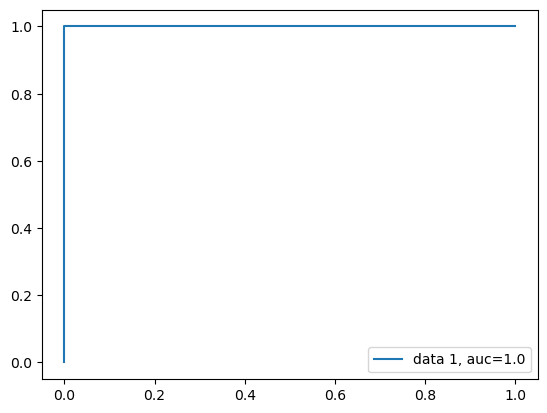

In [180]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Implementing XGBoost

XGBoost stands for eXtreme Gradient Boosting. XGBoost is an optimized distributed gradient boosting library that is efficient, flexible, and portable. It implements machine learning algorithms under Gradient Boosting framework. XGBoost features Parallel Tree Boosting (aka.  Gradient Boosting Decision Tree (GBDT), GBM), which can solve many data science problems quickly and accurately. The same code runs in large distributed environments (Kubernetes, Hadoop, SGE, MPI, Dask) and can solve problems with over billions of examples.

In [181]:
#import package for XGBoost
import lightgbm as lgb 
import xgboost as xgb

## Applying XGBost

In [182]:
#The data is stored in a DMatrix object. label is used to define our outcome variable
d_train =xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test)

In [183]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [184]:
#training our model 
num_round = 75
from datetime import datetime 
start = datetime.now() 
xg = xgb.train(parameters,d_train,num_round) 
stop = datetime.now()

[15:14:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [185]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=3, microseconds=960746)

Now, we can predict our model on train and test dataset

In [186]:
train_class_preds_probs = xg.predict(d_train) 
test_class_preds_probs = xg.predict(d_test) 

In [187]:
len(train_class_preds_probs)

35046

In [188]:
train_class_predict = []
test_class_predict = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_predict.append(1)
  else:
    train_class_predict.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_predict.append(1)
  else:
    test_class_predict.append(0)

In [189]:
test_class_preds_probs[:20]

array([0.9883858 , 0.01161422, 0.01161422, 0.9883858 , 0.01161422,
       0.01161422, 0.9883858 , 0.01161422, 0.01161422, 0.01161422,
       0.01161422, 0.9883858 , 0.01161422, 0.01161422, 0.01161422,
       0.9883858 , 0.9883858 , 0.9883858 , 0.9883858 , 0.01161422],
      dtype=float32)

In [190]:
test_class_predict[:20]

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]

In [191]:
print("Numbers of data training: ", len(y_train))

Numbers of data training:  35046


In [192]:
print("Numbers of data train class predictions: " ,len(train_class_predict))

Numbers of data train class predictions:  35046


In [193]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_predict, y_train)
test_accuracy_xgb = accuracy_score(test_class_predict, y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [194]:
test_accuracy_xgb = accuracy_score(test_class_predict, y_test)
test_precision_xgb = precision_score(test_class_predict, y_test)
test_recall_score_xgb = recall_score(test_class_predict, y_test)
test_f1_score_xgb = f1_score(test_class_predict, y_test)
test_roc_score_xgb = roc_auc_score(test_class_predict, y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

TypeError: 'list' object is not callable

## Hyperparameter Turning

Hyperparameter tuning is the challenge of choosing an appropriate set of hyperparameters for a learning algorithm. Hyperparameter tuning is a parameter value used to influence the learning process. Apart from this, other factors like node weights are also checked. To generalize to different data patterns, the same machine learning model requires different constraints, weights, or learning rates. These values ​​are called hyperparameters and need to be tuned in order for the model to perform machine learning tasks optimally. Hyperparameter tuning is the process of identifying tuples of hyperparameters that produce an optimal model that minimizes a predetermined loss function on the provided independent data.

In [195]:
from xgboost import  XGBClassifier

In [196]:
X = df_featrue_engineering.drop(['is_defaulter','Payement_Value','Dues'],axis=1)
y = df_featrue_engineering['is_defaulter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)

In [197]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 3)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=3)

In [198]:
optimal_xgb = gsearch1.best_estimator_

In [199]:
# Get the predicted classes
train_class_predict = optimal_xgb.predict(X_train)
test_class_predict = optimal_xgb.predict(X_test)

In [200]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_predict, y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_predict, y_test)

print("Accuracy on train data is ", train_accuracy_xgb_tuned)
print("Accuracy on test data is ", test_accuracy_xgb_tuned)

Accuracy on train data is  1.0
Accuracy on test data is  1.0


In [201]:
test_accuracy_xgb_tuned = accuracy_score(test_class_predict, y_test)
test_precision_xgb_tuned = precision_score(test_class_predict, y_test)
test_recall_score_xgb_tuned = recall_score(test_class_predict, y_test)
test_f1_score_xgb_tuned = f1_score(test_class_predict, y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_predict, y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

TypeError: 'list' object is not callable

In [202]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

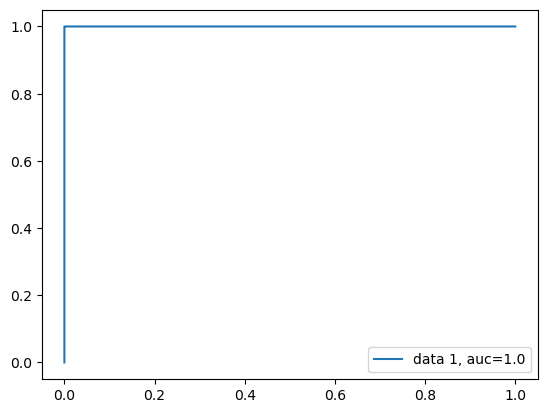

In [203]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [204]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}" 
torch.save(optimal_xgb, path)

In [205]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_xgb = torch.load(path)

## Evaluating the Models

In [206]:
recall_score

[1.0, 0.9948831656148729, 0.999828825744608, 1.0]

In [207]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [208]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,1.000000,1.000000,1.00000,1.000000,1.000000
1,SVC,0.999943,0.996747,0.99863,0.994883,0.996753
2,Random Forest CLf,1.000000,0.999914,1.00000,0.999829,0.999914
3,Xgboost Clf,1.000000,1.000000,1.00000,1.000000,1.000000


It can be seen from the table above that the prediction model developed is excellent; it has been demonstrated that this model can provide nearly perfect accuracy, precision, recall, and F1 values for various algorithms.

## Plotting ROC AUC for all the Models

In [216]:
classifiers_proba = [(optimized_clf, y_predict_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_predict_probability_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\Kevin Kiding\AppData\Local\Temp\ipykernel_11924\2289509758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
C:\Users\Kevin Kiding\AppData\Local\Temp\ipykernel_11924\2289509758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
C:\Users\Kevin Kiding\AppData\Local\Temp\ipykernel_11924\2289509758.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
C:\Users\Kevin Kiding\AppData\Local\Temp\ipykernel_11924\2289509758.py:15: FutureWarning: The frame.append method is deprecated and will

In [219]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0001712035610340695, 0.128916281458654...",1.000000
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.014894709809964048, 0.0154083204930662...",1.000000
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.001712035610340695, 0.0018832391713747...",1.000000
SVC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0001712035610340695, 0.261085430576956...",0.999958


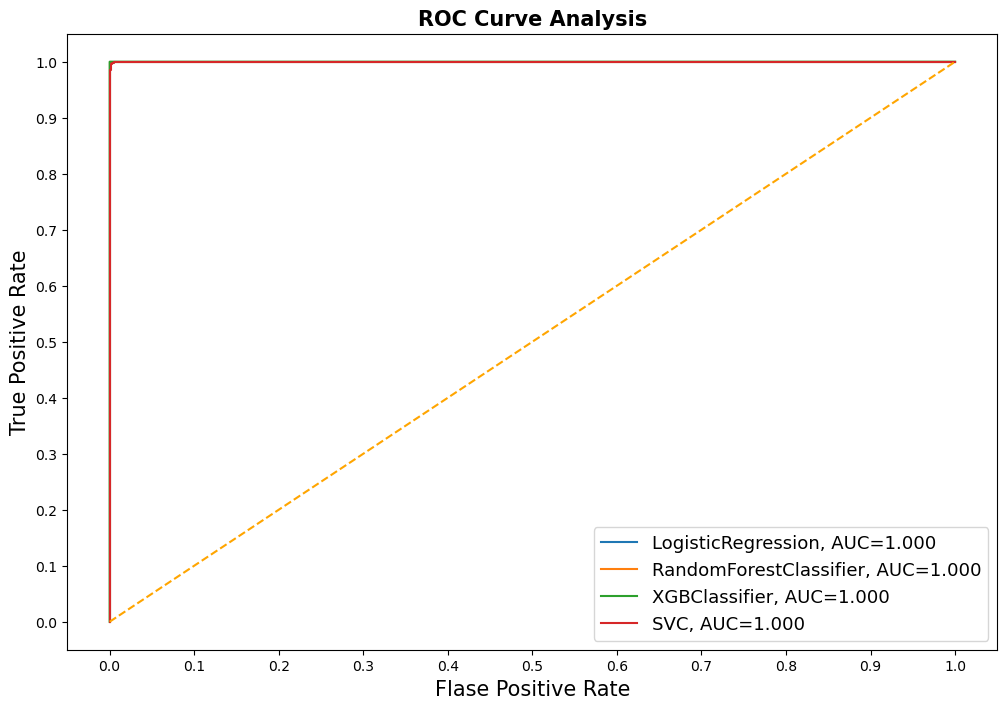

In [218]:
fig = plt.figure(figsize=(12,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()